In [30]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [31]:
import os
import subprocess

out_dir = "./us_accidents_data"
os.makedirs(out_dir, exist_ok=True)

subprocess.run([
    "kaggle", "datasets", "download",
    "-d", "sobhanmoosavi/us-accidents",
    "-p", out_dir,
    "--unzip"
], check=True)

print("Done. Files in:", os.path.abspath(out_dir))

Done. Files in: c:\Users\yusuf\OneDrive\Bureau\Universite\SESSION 8\INF8808\PROJET\INF8808_Projet\us_accidents_data


In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the US Accidents data
df = pd.read_csv("us_accidents_data/US_Accidents_March23.csv")
print(f"Dataset shape: {df.shape}")
print(f"Total rows: {df.shape[0]}, Total columns: {df.shape[1]}")

Dataset shape: (7728394, 46)
Total rows: 7728394, Total columns: 46


## Tableau 2.2.1
Informations Temporelles

In [33]:
# Données temporelles

print(df["Start_Time"].min(), df["Start_Time"].max())
print(df["End_Time"].min(), df["End_Time"].max())
print(df["Timezone"].unique())
print(df["Weather_Timestamp"].dropna().min(), df["Weather_Timestamp"].dropna().max())

2016-01-14 20:18:33 2023-03-31 23:30:00
2016-02-08 06:37:08 2023-03-31 23:59:00
['US/Eastern' 'US/Pacific' nan 'US/Central' 'US/Mountain']
2016-01-14 19:51:00 2023-03-31 23:53:00


## Tableau 2.2.2
Informations geographique

In [59]:
# Données géographiques
print(df["End_Lng"].min(), df["End_Lng"].max())
print(df["City"].value_counts().head(5))
print("City unique values : " + str(len(df["City"].unique())))
print(df["County"].value_counts().head(5))
print("County unique values : " + str(len(df["County"].unique())))
print(df["State"].value_counts().head(5))
print("State unique values : " + str(len(df["State"].unique())))
print(df["Zipcode"].value_counts().head(5))
print("Zipcode unique values : " + str(len(df["Zipcode"].unique())))
print(df["Street"].value_counts().head(5))
print("Street unique values : " + str(len(df["Street"].unique())))
print(df["Airport_Code"].value_counts().head(5))
print("Airport_Code unique values : " + str(len(df["Airport_Code"].unique())))

-124.545748 -67.10924200000001
City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: count, dtype: int64
City unique values : 13679
County
Los Angeles    526851
Miami-Dade     251601
Orange         241275
Harris         181196
Dallas         157024
Name: count, dtype: int64
County unique values : 1871
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: count, dtype: int64
State unique values : 49
Zipcode
91761    11247
91706    10022
92407     8922
92507     8850
33186     8375
Name: count, dtype: int64
Zipcode unique values : 825095
Street
I-95 N    78430
I-95 S    74528
I-5 N     71968
I-10 E    55572
I-10 W    53725
Name: count, dtype: int64
Street unique values : 336307
Airport_Code
KCQT    118332
KRDU    107267
KMCJ    101786
KBNA     98926
KCLT     97273
Name: count, dtype: int64
Airport_Code unique values : 2046


## Tableau 2.2.3
Informations sur la gravite et impact sur la circulation

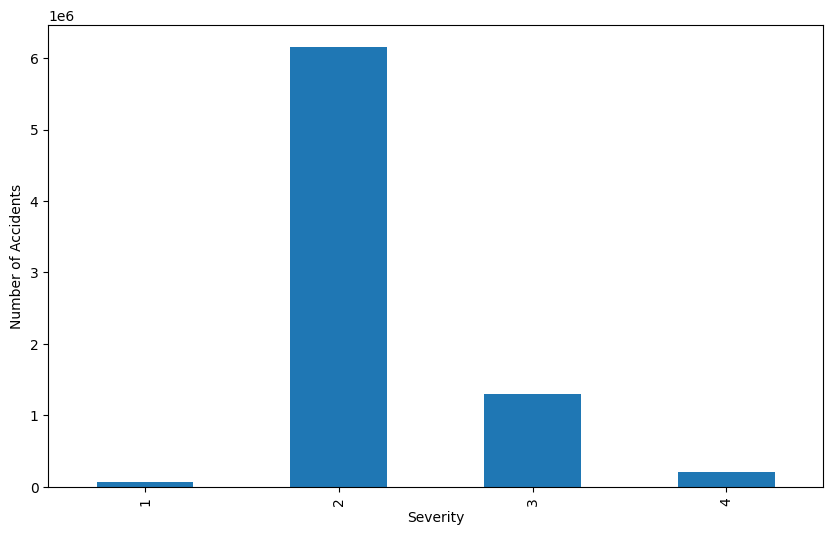

mean = 2.212384487643875
median = 2.0
std = 0.48753130239446674
max = 4
min = 1


In [86]:
#visualize the severity of accidents
import matplotlib.pyplot as plt

top_conditions = df['Severity'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
top_conditions.plot(kind='bar')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.show()


print("mean = " + str(np.mean(df["Severity"])))
print("median = " + str(np.median(df["Severity"])))
print("std = " + str(np.std(df["Severity"])))
print("max = " + str(np.max(df["Severity"])))
print("min = " + str(np.min(df["Severity"])))


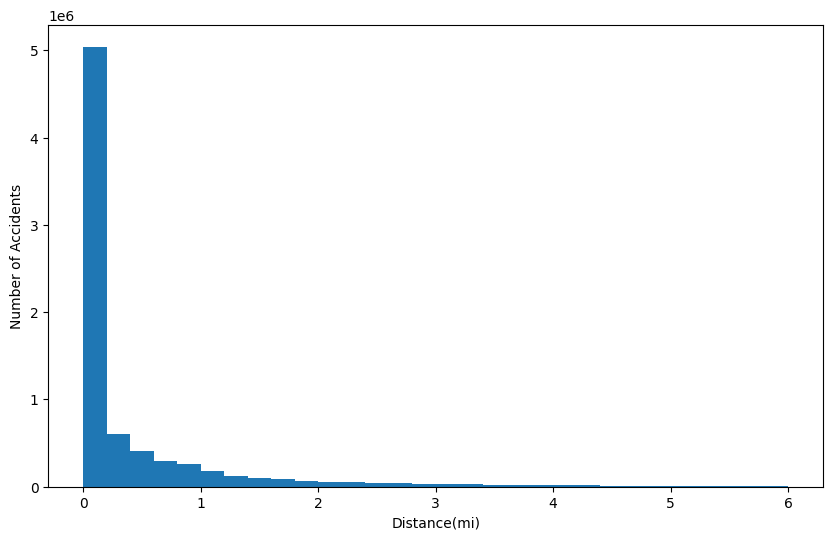

mean = 0.5618422831523753
median = 0.03
std = 1.7768104882436746
max = 441.75
min = 0.0


In [87]:
#visualize the Distance(mi) of accidents

top_conditions = df['Distance(mi)']
top_conditions = top_conditions[top_conditions < 6]  # Filter out outliers for better visualization
# Filter out outliers for better visualization
plt.figure(figsize=(10, 6))
plt.hist(top_conditions.values, bins=30)
plt.xlabel('Distance(mi)')
plt.ylabel('Number of Accidents')
plt.show()


print("mean = " + str(np.mean(df["Distance(mi)"])))
print("median = " + str(np.median(df["Distance(mi)"])))
print("std = " + str(np.std(df["Distance(mi)"])))
print("max = " + str(np.max(df["Distance(mi)"])))
print("min = " + str(np.min(df["Distance(mi)"])))

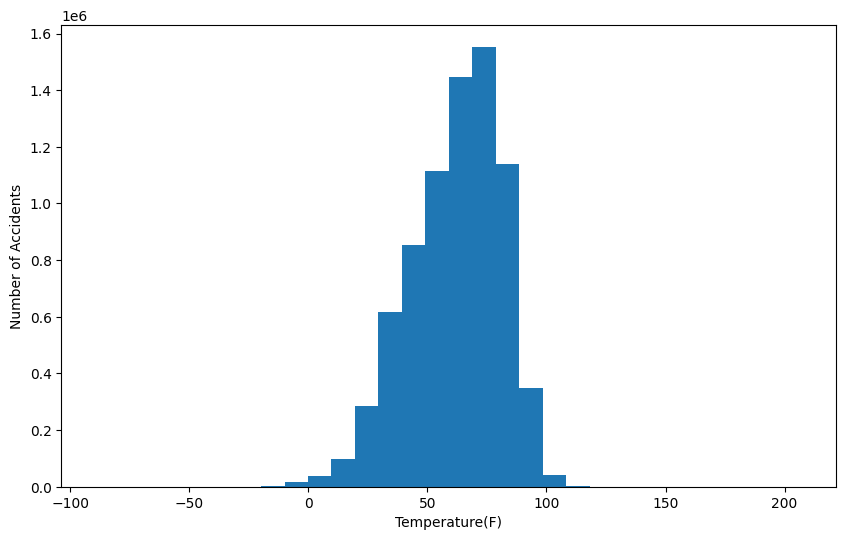

mean = 61.66328580940999
median = 64.0
std = 19.013652034331066
max = 207.0
min = -89.0


In [95]:
#visualize the Tempature(F)) of accidents
top_conditions = df['Temperature(F)']
# Filter out outliers for better visualization
plt.figure(figsize=(10, 6))
plt.hist(top_conditions.values, bins=30)
plt.xlabel('Temperature(F)')
plt.ylabel('Number of Accidents')
plt.show()


print("mean = " + str(np.mean(df["Temperature(F)"])))
print("median = " + str(np.nanmedian(df["Temperature(F)"])))
print("std = " + str(np.std(df["Temperature(F)"])))
print("max = " + str(np.max(df["Temperature(F)"])))
print("min = " + str(np.min(df["Temperature(F)"])))

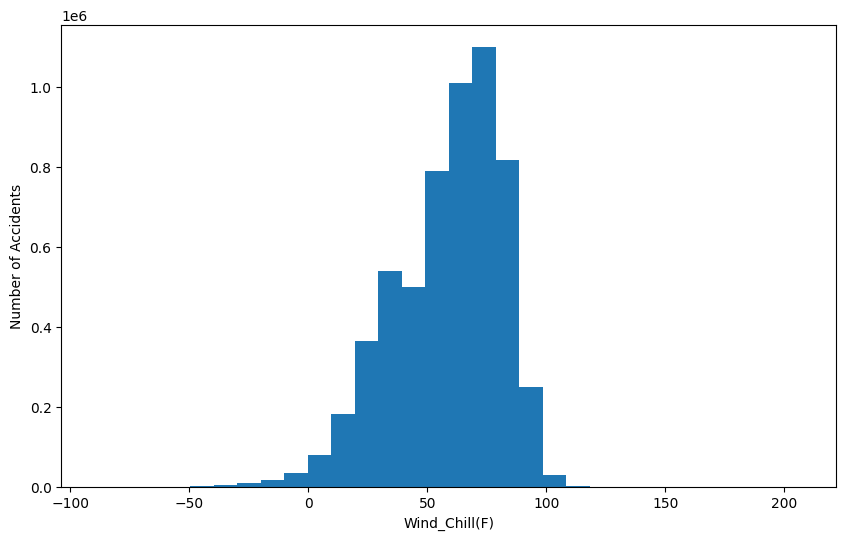

mean = 58.251048395331075
median = 62.0
std = 22.38982979566999
max = 207.0
min = -89.0


In [96]:
#visualize the Wind_Chill(F) of accidents
top_conditions = df['Wind_Chill(F)']
# Filter out outliers for better visualization
plt.figure(figsize=(10, 6))
plt.hist(top_conditions.values, bins=30)
plt.xlabel('Wind_Chill(F)')
plt.ylabel('Number of Accidents')
plt.show()


print("mean = " + str(np.mean(df["Wind_Chill(F)"])))
print("median = " + str(np.nanmedian(df["Wind_Chill(F)"])))
print("std = " + str(np.std(df["Wind_Chill(F)"])))
print("max = " + str(np.max(df["Wind_Chill(F)"])))
print("min = " + str(np.min(df["Wind_Chill(F)"])))

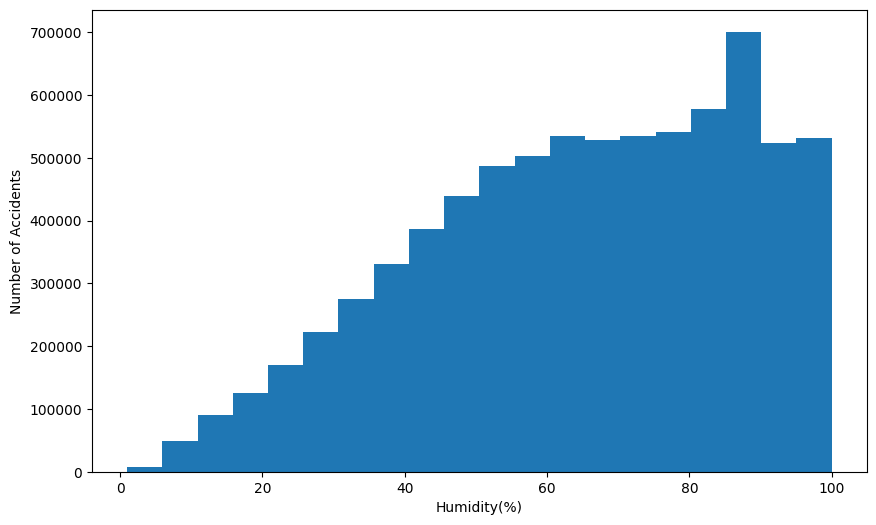

mean = 64.83104146672403
median = 67.0
std = 22.82096614964141
max = 100.0
min = 1.0


In [102]:
#visualize the Humidity(%) of accidents
top_conditions = df['Humidity(%)']
# Filter out outliers for better visualization
plt.figure(figsize=(10, 6))
plt.hist(top_conditions.values, bins=20)
plt.xlabel('Humidity(%)')
plt.ylabel('Number of Accidents')
plt.show()


print("mean = " + str(np.mean(df["Humidity(%)"])))
print("median = " + str(np.nanmedian(df["Humidity(%)"])))
print("std = " + str(np.std(df["Humidity(%)"])))
print("max = " + str(np.max(df["Humidity(%)"])))
print("min = " + str(np.min(df["Humidity(%)"])))

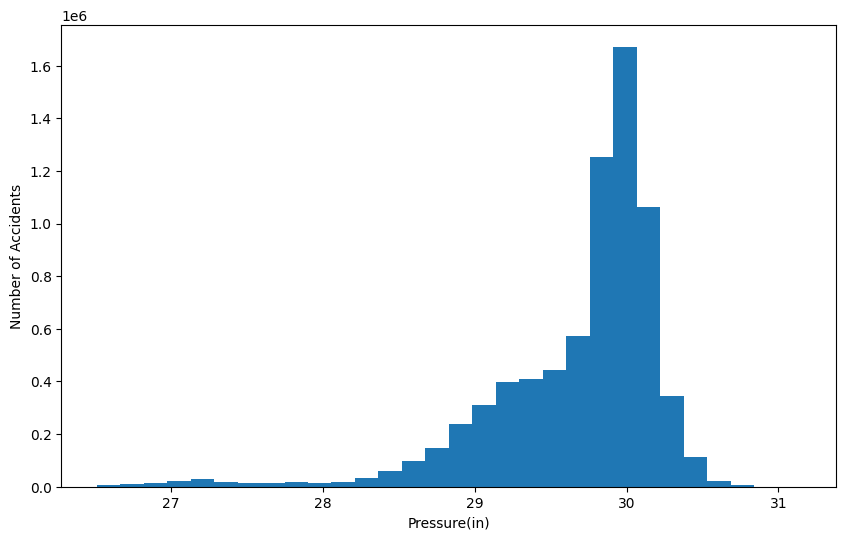

mean = 29.53898560765659
median = 29.86
std = 1.0061897428417164
max = 58.63
min = 0.0


In [105]:
#visualize the Pressure(in) of accidents
top_conditions = df['Pressure(in)']
top_conditions = top_conditions[top_conditions < 32.5]  # Filter out outliers for better visualization
top_conditions = top_conditions[top_conditions > 26.5]  # Filter out outliers for better visualization
# Filter out outliers for better visualization
plt.figure(figsize=(10, 6))
plt.hist(top_conditions.values, bins=30)
plt.xlabel('Pressure(in)')
plt.ylabel('Number of Accidents')
plt.show()


print("mean = " + str(np.mean(df["Pressure(in)"])))
print("median = " + str(np.nanmedian(df["Pressure(in)"])))
print("std = " + str(np.std(df["Pressure(in)"])))
print("max = " + str(np.max(df["Pressure(in)"])))
print("min = " + str(np.min(df["Pressure(in)"])))

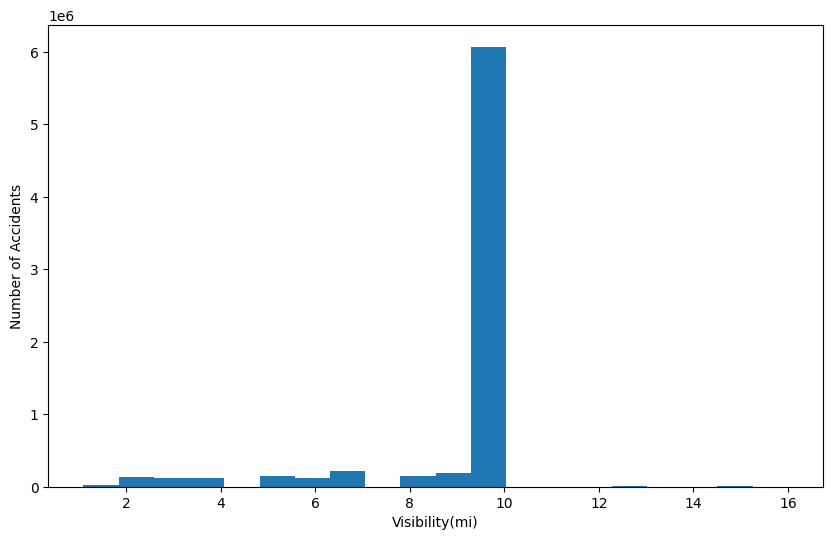

mean = 9.09037644796337
median = 10.0
std = 2.68831574341352
max = 140.0
min = 0.0


In [112]:
#visualize the Visibility(mi) of accidents
top_conditions = df['Visibility(mi)']
top_conditions = top_conditions[top_conditions < 17.2]  # Filter out outliers for better visualization
top_conditions = top_conditions[top_conditions > 1]  # Filter out outliers for better visualization
# Filter out outliers for better visualization
plt.figure(figsize=(10, 6))
plt.hist(top_conditions.values, bins=20)
plt.xlabel('Visibility(mi)')
plt.ylabel('Number of Accidents')
plt.show()


print("mean = " + str(np.mean(df["Visibility(mi)"])))
print("median = " + str(np.nanmedian(df["Visibility(mi)"])))
print("std = " + str(np.std(df["Visibility(mi)"])))
print("max = " + str(np.max(df["Visibility(mi)"])))
print("min = " + str(np.min(df["Visibility(mi)"])))

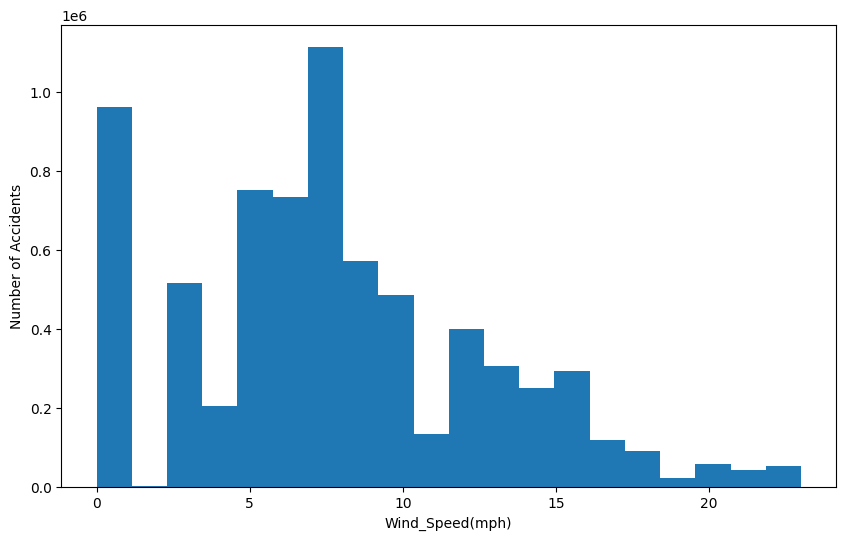

mean = 7.685489595665097
median = 7.0
std = 5.424983058171157
max = 1087.0
min = 0.0


In [116]:
#visualize the Wind_Speed(mph) of accidents
top_conditions = df['Wind_Speed(mph)']
top_conditions = top_conditions[top_conditions < 24]  # Filter out outliers for better visualization
# top_conditions = top_conditions[top_conditions > 0]  # Filter out outliers for better visualization
# Filter out outliers for better visualization
plt.figure(figsize=(10, 6))
plt.hist(top_conditions.values, bins=20)
plt.xlabel('Wind_Speed(mph)')
plt.ylabel('Number of Accidents')
plt.show()


print("mean = " + str(np.mean(df["Wind_Speed(mph)"])))
print("median = " + str(np.nanmedian(df["Wind_Speed(mph)"])))
print("std = " + str(np.std(df["Wind_Speed(mph)"])))
print("max = " + str(np.max(df["Wind_Speed(mph)"])))
print("min = " + str(np.min(df["Wind_Speed(mph)"])))

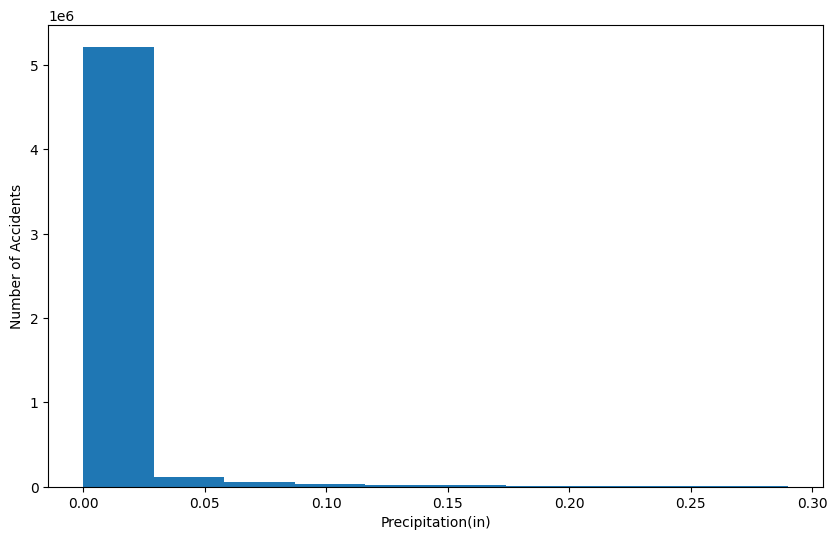

mean = 0.008407209807110039
median = 0.0
std = 0.11022463888252673
max = 36.47
min = 0.0


In [119]:
#visualize the Precipitation(in) of accidents
top_conditions = df['Precipitation(in)']
top_conditions = top_conditions[top_conditions < 0.3]  # Filter out outliers for better visualization
# top_conditions = top_conditions[top_conditions > 0]  # Filter out outliers for better visualization
# Filter out outliers for better visualization
plt.figure(figsize=(10, 6))
plt.hist(top_conditions.values, bins=10)
plt.xlabel('Precipitation(in)')
plt.ylabel('Number of Accidents')
plt.show()


print("mean = " + str(np.mean(df["Precipitation(in)"])))
print("median = " + str(np.nanmedian(df["Precipitation(in)"])))
print("std = " + str(np.std(df["Precipitation(in)"])))
print("max = " + str(np.max(df["Precipitation(in)"])))
print("min = " + str(np.min(df["Precipitation(in)"])))

## Tableau 2.2.5
Informations qualitatives sur la météo

In [35]:
print("Wind_Direction Column Info:")
print(f"Data type: {df['Wind_Direction'].dtype}")
print(f"Non-null values: {df['Wind_Direction'].notna().sum()}")
print(f"Unique values: {df['Wind_Direction'].nunique()}")
print("\nWind direction distribution:")
wind_counts = df['Wind_Direction'].value_counts()
wind_percentages = (wind_counts / wind_counts.sum()) * 100
for idx, (count, pct) in enumerate(zip(wind_counts, wind_percentages)):
    print(f"{wind_counts.index[idx]}: {count} ({pct:.2f}%)")

Wind_Direction Column Info:
Data type: object
Non-null values: 7553188
Unique values: 24

Wind direction distribution:
CALM: 961624 (12.73%)
S: 419989 (5.56%)
SSW: 384840 (5.10%)
W: 383913 (5.08%)
WNW: 378781 (5.01%)
NW: 369352 (4.89%)
Calm: 368557 (4.88%)
SW: 364470 (4.83%)
WSW: 353806 (4.68%)
SSE: 349110 (4.62%)
NNW: 333427 (4.41%)
N: 307151 (4.07%)
SE: 294901 (3.90%)
E: 278914 (3.69%)
ESE: 268311 (3.55%)
NE: 258639 (3.42%)
ENE: 258474 (3.42%)
NNE: 255311 (3.38%)
VAR: 250566 (3.32%)
South: 177375 (2.35%)
West: 164751 (2.18%)
North: 153385 (2.03%)
Variable: 113996 (1.51%)
East: 103545 (1.37%)


In [36]:
print("Weather_Condition Column Info:")
print(f"Data type: {df['Weather_Condition'].dtype}")
print(f"Non-null values: {df['Weather_Condition'].notna().sum()}")
print(f"Unique values: {df['Weather_Condition'].nunique()}")
print("\nTop 20 weather conditions:")
weather_counts = df['Weather_Condition'].value_counts().head(20)
weather_percentages = (weather_counts / df['Weather_Condition'].count()) * 100
for idx, (count, pct) in enumerate(zip(weather_counts, weather_percentages)):
    print(f"{weather_counts.index[idx]}: {count} ({pct:.2f}%)")
#Total percentage
total_percentage = (weather_counts.sum() / df['Weather_Condition'].count()) * 100
print(f"\nTotal percentage of top 20 conditions: {total_percentage:.2f}%")

Weather_Condition Column Info:
Data type: object
Non-null values: 7554935
Unique values: 144

Top 20 weather conditions:
Fair: 2560802 (33.90%)
Mostly Cloudy: 1016195 (13.45%)
Cloudy: 817082 (10.82%)
Clear: 808743 (10.70%)
Partly Cloudy: 698972 (9.25%)
Overcast: 382866 (5.07%)
Light Rain: 352957 (4.67%)
Scattered Clouds: 204829 (2.71%)
Light Snow: 128680 (1.70%)
Fog: 99238 (1.31%)
Rain: 84331 (1.12%)
Haze: 76223 (1.01%)
Fair / Windy: 35671 (0.47%)
Heavy Rain: 32309 (0.43%)
Light Drizzle: 22684 (0.30%)
Thunder in the Vicinity: 17611 (0.23%)
Cloudy / Windy: 17035 (0.23%)
T-Storm: 16810 (0.22%)
Mostly Cloudy / Windy: 16508 (0.22%)
Snow: 15537 (0.21%)

Total percentage of top 20 conditions: 98.02%


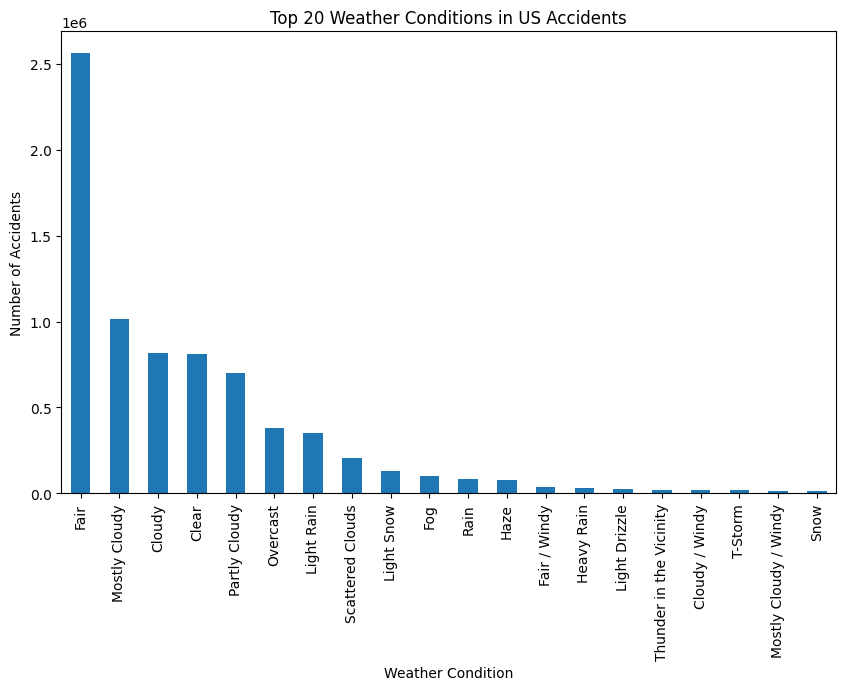

In [37]:
#visualize the distribution of weather conditions
import matplotlib.pyplot as plt

top_conditions = df['Weather_Condition'].value_counts().head(20)
plt.figure(figsize=(10, 6))
top_conditions.plot(kind='bar')
plt.title('Top 20 Weather Conditions in US Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

## Tableau 2.2.6
Infrastructures et caractéristiques routières

In [38]:
print("Junction Column Info:")
print(f"Data type: {df['Junction'].dtype}")
print(f"Non-null values: {df['Junction'].notna().sum()}")
print(f"Unique values: {df['Junction'].nunique()}")
print("\nJunction distribution:")
junction_counts = df['Junction'].value_counts()
junction_percentages = (junction_counts / junction_counts.sum()) * 100
for idx, (count, pct) in enumerate(zip(junction_counts, junction_percentages)):
    print(f"{junction_counts.index[idx]}: {count} ({pct:.2f}%)")

Junction Column Info:
Data type: bool
Non-null values: 7728394
Unique values: 2

Junction distribution:
False: 7157052 (92.61%)
True: 571342 (7.39%)


In [39]:
print("Traffic_Signal Column Info:")
print(f"Data type: {df['Traffic_Signal'].dtype}")
print(f"Non-null values: {df['Traffic_Signal'].notna().sum()}")
print(f"Unique values: {df['Traffic_Signal'].nunique()}")
print("\nTraffic signal distribution:")
traffic_signal_counts = df['Traffic_Signal'].value_counts()
traffic_signal_percentages = (traffic_signal_counts / traffic_signal_counts.sum()) * 100
for idx, (count, pct) in enumerate(zip(traffic_signal_counts, traffic_signal_percentages)):
    print(f"{traffic_signal_counts.index[idx]}: {count} ({pct:.2f}%)")

Traffic_Signal Column Info:
Data type: bool
Non-null values: 7728394
Unique values: 2

Traffic signal distribution:
False: 6584622 (85.20%)
True: 1143772 (14.80%)


In [40]:
print("Stop/Give_Way Column Info (OR operation):")
stop_or_give_way = df['Stop'] | df['Give_Way']
print(f"Data type: bool")
print(f"Non-null values: {stop_or_give_way.notna().sum()}")
stop_counts = stop_or_give_way.value_counts()
stop_percentages = (stop_counts / stop_counts.sum()) * 100
print("Stop OR Give_Way distribution:")
for idx, (count, pct) in enumerate(zip(stop_counts, stop_percentages)):
    print(f"{stop_counts.index[idx]}: {count} ({pct:.2f}%)")

Stop/Give_Way Column Info (OR operation):
Data type: bool
Non-null values: 7728394
Stop OR Give_Way distribution:
False: 7481130 (96.80%)
True: 247264 (3.20%)


In [41]:
print("Crossing Column Info:")
print(f"Data type: {df['Crossing'].dtype}")
print(f"Non-null values: {df['Crossing'].notna().sum()}")
print(f"Unique values: {df['Crossing'].nunique()}")
print("\nCrossing distribution:")
crossing_counts = df['Crossing'].value_counts()
crossing_percentages = (crossing_counts / crossing_counts.sum()) * 100
for idx, (count, pct) in enumerate(zip(crossing_counts, crossing_percentages)):
    print(f"{crossing_counts.index[idx]}: {count} ({pct:.2f}%)")

Crossing Column Info:
Data type: bool
Non-null values: 7728394
Unique values: 2

Crossing distribution:
False: 6854631 (88.69%)
True: 873763 (11.31%)


In [42]:
print("Traffic_Calming/Bump Column Info (OR operation):")
traffic_calming_or_bump = df['Traffic_Calming'] | df['Bump']
print(f"Data type: bool")
print(f"Non-null values: {traffic_calming_or_bump.notna().sum()}")
tcb_counts = traffic_calming_or_bump.value_counts()
tcb_percentages = (tcb_counts / tcb_counts.sum()) * 100
print("Traffic_Calming OR Bump distribution:")
for idx, (count, pct) in enumerate(zip(tcb_counts, tcb_percentages)):
    print(f"{tcb_counts.index[idx]}: {count} ({pct:.2f}%)")

Traffic_Calming/Bump Column Info (OR operation):
Data type: bool
Non-null values: 7728394
Traffic_Calming OR Bump distribution:
False: 7720796 (99.90%)
True: 7598 (0.10%)


In [43]:
print("Railway/Roundabout Column Info (OR operation):")
railway_or_roundabout = df['Railway'] | df['Roundabout']
print(f"Data type: bool")
print(f"Non-null values: {railway_or_roundabout.notna().sum()}")
rr_counts = railway_or_roundabout.value_counts()
rr_percentages = (rr_counts / rr_counts.sum()) * 100
print("Railway OR Roundabout distribution:")
for idx, (count, pct) in enumerate(zip(rr_counts, rr_percentages)):
    print(f"{rr_counts.index[idx]}: {count} ({pct:.2f}%)")

Railway/Roundabout Column Info (OR operation):
Data type: bool
Non-null values: 7728394
Railway OR Roundabout distribution:
False: 7661166 (99.13%)
True: 67228 (0.87%)


In [44]:
print("Amenity/Station Column Info (OR operation):")
amenity_or_station = df['Amenity'] | df['Station']
print(f"Data type: bool")
print(f"Non-null values: {amenity_or_station.notna().sum()}")
as_counts = amenity_or_station.value_counts()
as_percentages = (as_counts / as_counts.sum()) * 100
print("Amenity OR Station distribution:")
for idx, (count, pct) in enumerate(zip(as_counts, as_percentages)):
    print(f"{as_counts.index[idx]}: {count} ({pct:.2f}%)")

Amenity/Station Column Info (OR operation):
Data type: bool
Non-null values: 7728394
Amenity OR Station distribution:
False: 7453375 (96.44%)
True: 275019 (3.56%)


In [45]:
print("No_Exit/Turning_Loop Column Info (OR operation):")
no_exit_or_turning_loop = df['No_Exit'] | df['Turning_Loop']
print(f"Data type: bool")
print(f"Non-null values: {no_exit_or_turning_loop.notna().sum()}")
netl_counts = no_exit_or_turning_loop.value_counts()
netl_percentages = (netl_counts / netl_counts.sum()) * 100
print("No_Exit OR Turning_Loop distribution:")
for idx, (count, pct) in enumerate(zip(netl_counts, netl_percentages)):
    print(f"{netl_counts.index[idx]}: {count} ({pct:.2f}%)")

No_Exit/Turning_Loop Column Info (OR operation):
Data type: bool
Non-null values: 7728394
No_Exit OR Turning_Loop distribution:
False: 7708849 (99.75%)
True: 19545 (0.25%)
